In [6]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [8]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# 2. Dataset
df = pd.read_csv("data/stud.csv")
df.shape
df.head()
# 3. Data Checks
## 3.1 missing values
df.isna().sum()
# no missing vals
## 3.2 duplicates 
df.duplicated().sum()
# no duplicate vals
## 3.3 data type
df.info()
## 3.4 no of unique vals of each feature
df.nunique()
## 3.5 statistics of numerical features
df.describe()
# * all means are close to each other
# * SDs are also close
# * min score (math = 0, reading = 17 highest, writing = 10)  
## 3.7 exploring data
print("categories in GENDER var:  ", end="")
print(df['gender'].unique())

print("categories in RACE_ETHNICITY var:  ", end="")
print(df['race_ethnicity'].unique())

print("categories in PARENTAL_LEVEL_OF_EDUCATION var:  ", end="")
print(df['parental_level_of_education'].unique())

print("categories in LUNCH var:  ", end="")
print(df['lunch'].unique())

print("categories in TEST_PREPARATION_COURSE var:  ", end="")
print(df['test_preparation_course'].unique())
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('len of numeric features: {}'.format(len(num_features)))
print('len of categorical features: {}'.format(len(cat_features)))
df['total_score'] = df['math_score']+ df['reading_score'] + df['writing_score']
df['average_score'] = df['total_score']/3
df.head()
# 4. data visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
categories in GENDER var:  ['female' 'male']
categories in RACE_ETHNICITY var:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in PARENTAL_LEVEL_OF_EDUCATION var:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'som

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# 5. Model Training

making math score as the dependent var

In [11]:
X = df.drop(columns=['math_score'])
y = df['math_score']

In [13]:
#col transformer

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

(1000, 9)

In [17]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(), cat_features),
    ('std_scaler', StandardScaler(), num_features)

])

In [26]:
Xt = preprocessor.fit_transform(X)
print('before transformation: ', X.shape)
print(X.head())
print('')
print('after transformation: ', Xt.shape)
print(Xt[:5])


before transformation:  (1000, 9)
   gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  reading_score  writing_score  total_score  \
0                    none             72             74          218   
1               completed             90             88          247   
2                    none             95             93          278   
3                    none             57             44          148   
4                    none             78             75          229   

   average_score  
0      72.666667  
1      82.333333  
2      92.666667  
3      49.333333  
4      76.333333 

In [27]:
#separate dt into test and test
from sklearn.model_selection import test_test_split
X_test, X_test, y_test, y_test = test_test_split(Xt, y, test_size=0.2, random_state=42)
X_test.shape, X_test.shape

((800, 21), (200, 21))

In [35]:
models = {
    "l_reg": LinearRegression(),
    "lasso_reg": Lasso(),
    "ridge_reg": Ridge(),
    "knn_reg": KNeighborsRegressor(),
    "dt_reg": DecisionTreeRegressor(),
    "rf_reg": RandomForestRegressor(),
    "xgb_reg": XGBRegressor(),
    "cb_reg": CatBoostRegressor(),
    "ab_reg": AdaBoostRegressor()
}

models_list = []
r2_list= []

for i in range(len(list(models))):
    #model training
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    #model prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    #model evaluation
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print("Model Performance on train set")
    print("root mean squared error: {:.2f}".format(model_train_rmse))
    print("mean absolute error: {:.2f}".format(model_train_mae))
    print("r2 score: {:.2f}".format(model_train_r2))

    print("-------------------------------")

    print("Model Performance on test set")
    print("root mean squared error: {:.2f}".format(model_test_rmse))
    print("mean absolute error: {:.2f}".format(model_test_mae))
    print("r2 score: {:.2f}".format(model_test_r2))

    r2_list.append(model_test_r2)

    print("="*80)
    print('\n')

l_reg
Model Performance on train set
root mean squared error: 0.00
mean absolute error: 0.00
r2 score: 1.00
-------------------------------
Model Performance on test set
root mean squared error: 0.00
mean absolute error: 0.00
r2 score: 1.00


lasso_reg
Model Performance on train set
root mean squared error: 4.74
mean absolute error: 3.74
r2 score: 0.90
-------------------------------
Model Performance on test set
root mean squared error: 4.72
mean absolute error: 3.76
r2 score: 0.91


ridge_reg
Model Performance on train set
root mean squared error: 0.34
mean absolute error: 0.27
r2 score: 1.00
-------------------------------
Model Performance on test set
root mean squared error: 0.34
mean absolute error: 0.27
r2 score: 1.00


knn_reg
Model Performance on train set
root mean squared error: 4.28
mean absolute error: 3.38
r2 score: 0.92
-------------------------------
Model Performance on test set
root mean squared error: 5.18
mean absolute error: 4.05
r2 score: 0.89


dt_reg
Model Perfo

In [36]:
pd.DataFrame(list(zip(models_list, r2_list)), columns=['model', 'R2_score']).sort_values(by=['R2_score'], ascending=False)

,model,R2_score
0,l_reg,1.000000
2,ridge_reg,0.999516
6,xgb_reg,0.975401
7,cb_reg,0.968100
5,rf_reg,0.962843
4,dt_reg,0.934310
8,ab_reg,0.923785
1,lasso_reg,0.908560
3,knn_reg,0.889781


In [40]:
l_reg = LinearRegression(fit_intercept=True)
l_reg = l_reg.fit(X_train, y_train)
y_pred = l_reg.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("accuracy of model is %.2f" %score)

accuracy of model is 100.00


Text(0, 0.5, 'predicted')

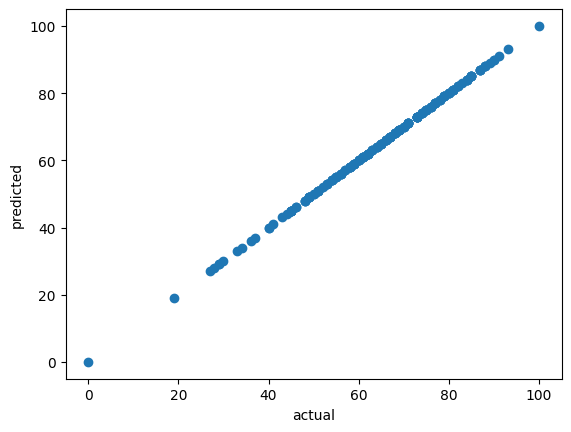

In [43]:
plt.scatter(y_test, y_pred)
plt.xlabel('actual')
plt.ylabel('predicted')